该脚本提供了基于绝对到时数据，生成共源双差数据和共台站双差数据的方法

This script aims at generating common source differential traveltime and common receiver differential traveltime based on absolute traveltime 

In [13]:
# load functions for data processing
%run ../utils/functions_for_data.ipynb

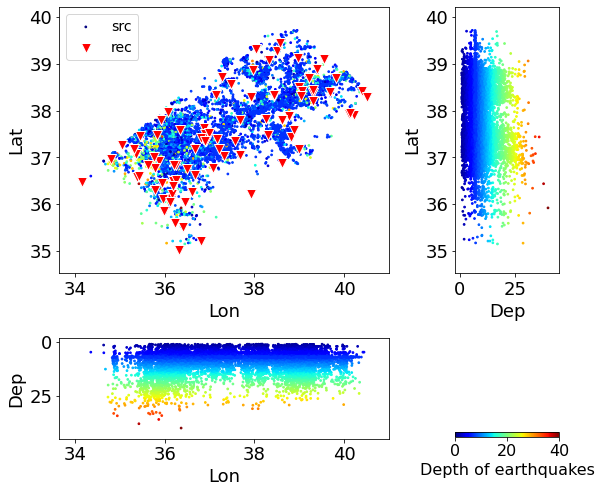

In [14]:
# 读取数据文件 read .dat file
fname = "output_data/alg4_src_rec.dat"
[ev_info_obs, st_info_obs] = read_src_rec_file(fname)

# 地震分布画图 plot data distribution
fig_ev_st_distribution_dep(ev_info_obs, st_info_obs)

In [15]:
# generate common source differential traveltime

dis_thd = 100 # distance between two stations should be less than 100 km
azi_thd = 30  # the angle bwteen two great circle paths from the common source to two separated stations should be less than 30

ev_info = generate_cs_dif(ev_info_obs,st_info_obs,dis_thd,azi_thd)

we generate 81847 double difference data from 152262 absolute traveltime data


In [18]:
# output data 输出数据
out_path = "output_data"

# 保存用于TomoATT反演的数据文件 save data for TomoATT
out_fname = "%s/alg5_src_rec_Abs_Cs.dat"%(out_path)
write_src_rec_file(out_fname,ev_info_obs,st_info_obs)


src_rec.dat has been outputed: 20531 events, 92 stations, 152262 abs traveltime, 81847 cs_dif traveltime, 0 cr_dif traveltime. 
earthquake and station region, lat:   35.0 -   39.7, lon:   34.1 -   40.5, dep:   -1.9 -   40.0


In [ ]:
# generate common receiver differential traveltime

dis_thd = 10  # distance between two earthquakes should be less than 100 km

ev_info = generate_cr_dif(ev_info_obs,st_info_obs,dis_thd)

In [ ]:
# output data 输出数据
out_path = "output_data"

# 保存用于TomoATT反演的数据文件 save data for TomoATT
out_fname = "%s/alg5_src_rec_Abs_Cs_Cr.dat"%(out_path)
write_src_rec_file(out_fname,ev_info_obs,st_info_obs)